In [1]:
#Import bibs
import pandas as pd
import numpy as np
import progressbar
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib notebook
import itertools
import os
import sys
from IPython.display import display, HTML

In [2]:
#Import funtions
sys.path.insert(0, '../Implementation_Events_Kopie/')
from Event_detection_functions import combine_charging_events
sys.path.insert(0, '../')
from IMPORT_DATAFRAME_JSON_HDF5 import *
sys.path.insert(0, '../Plotting_Skript/')
from plot_transients_function import *

In [3]:
data_month = pd.read_pickle('../../../transient_features/transients_all_08')
all_data = pd.read_pickle('all_transients_features_only')

In [4]:
data_month['first_peak'] = data_month['three_first_peaks'].apply(lambda x: float(x[0]))
data_month['first_peak'] = pd.to_numeric(data_month['first_peak'] )

In [5]:
data_month_einschalt = data_month[data_month['plugin_on_this_phase']==True]
data_month_outside = data_month[data_month['event_from_outside']==True]
data_month_leistungsdip = data_month[data_month['Leistungsdip_on_this_phase']==True]
data_month_Sonstige = data_month[data_month['Sonstige_Leistungsaenderung_this_phase']==True]

In [6]:
def plot_transients (transients_df, number_plots, column_to_plot, columns_of_figure):
    values_to_plot = column_to_plot
    number_of_subplots=number_plots
    number_of_columns=columns_of_figure
    transients=transients_df
    fig = plt.figure(figsize=(5*number_of_columns,number_of_subplots) )
    fig.subplots_adjust(hspace=.5)
    b=0
    for v in range(0,(number_of_subplots)):
        v = v+1
        #print(v)
        #preprocessing before printing
        transient_rise_gradient = transients.iloc[v]['transient_rise_gradient']
        if transient_rise_gradient<0:
            z=-1
        else:
            z=1
            
        phase = transients.iloc[v]['phase_num']
        num_cars_on_phase = str(int(transients.iloc[v]['cars_on_this_phase']))
        voltage_peak = transients.iloc[v]['three_first_peaks'][0]
        #print((transients.iloc[v]['begin_index']+1000)-10000)
        
       #if ((transients.iloc[v]['begin_index']+1000)-10000>500):
        #   continue
        ax1 = subplot(number_of_subplots,number_of_columns,v-b)
        plot_array=np.asarray(transients.iloc[v][values_to_plot])*z
        ax1.plot(plot_array)
        ax1.scatter(np.asarray(transients.iloc[v]['three_first_peaks_index'][0]),transients.iloc[v]['filtered_signal'][int(transients.iloc[v]['three_first_peaks_index'][0])]*z, color='blue')
        ax1.scatter(np.asarray(transients.iloc[v]['three_first_peaks_index'][1]),transients.iloc[v]['filtered_signal'][int(transients.iloc[v]['three_first_peaks_index'][1])]*z, color='blue')
        ax1.scatter(np.asarray(transients.iloc[v]['three_first_peaks_index'][2]),transients.iloc[v]['filtered_signal'][int(transients.iloc[v]['three_first_peaks_index'][2])]*z, color='blue')

        plt.suptitle(values_to_plot)
        plt.title('cars/phase: '+num_cars_on_phase +'  V_peak: '+ str(voltage_peak)+'  Plugin='+str(transients.iloc[v]['plugin_on_this_phase']),fontsize=10)
        plt.xlim([transients.iloc[v]['begin_index']-100,transients.iloc[v]['begin_index']+2000])
        plt.setp(ax1.get_xticklabels(), visible=False)
    
    return

<IPython.core.display.Javascript object>


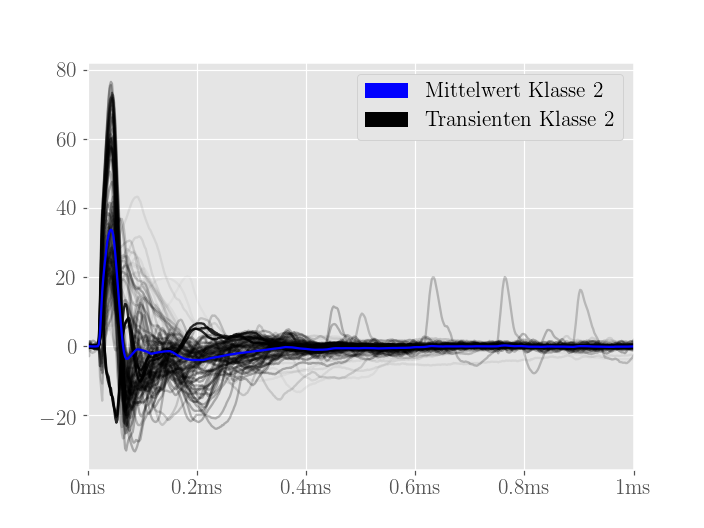

In [48]:
#fig = plt.figure()
plt.figure()
transients = cluster_3
num_transients = 100
average_40_cluster_1 = np.zeros(510)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=14)
for v in range(0,num_transients):
    transient_rise_gradient = transients.iloc[v]['transient_rise_gradient']
    if transient_rise_gradient<0:
        z=-1
    else:
        z=1

    begin_index = transients.iloc[v]['begin_index']- 10 
    end_index = transients.iloc[v]['begin_index'] + 500
    if end_index>10000:
        end_index=9999
    if begin_index<0:
        begin_index = 0
    
    #normalisieren
    y_data_nn= np.asarray(transients.iloc[v]['filtered_signal'])[begin_index:end_index]*z
    y_data = y_data_nn/max(abs(y_data_nn))
    
    #correlation
    correlcoeff = np.corrcoef(average_40_c1,y_data)[0,1]
    #print(correlcoeff)
    #average
    average_40_cluster_1 = y_data_nn+average_40_cluster_1
    try:
        plot1 = plt.plot(np.arange(end_index-begin_index),(y_data_nn),color = 'black', linewidth=1.5,alpha=correlcoeff*0.3)
    except:
        continue
    #plt.xlim([transients.iloc[v]['begin_index']-100,transients.iloc[v]['begin_index']+1000])

average_40_c1 = average_40_cluster_1 /num_transients
plot_mean = plt.plot(np.arange(end_index-begin_index),(average_40_c1), linewidth=1.5, color = 'blue')
#plt.plot(np.arange(end_index-begin_index),(average_6*z))


plt.xlim([0,500])
plt.xticks(range(0,600,100),('0ms','0.2ms','0.4ms','0.6ms','0.8ms','1ms'))
from matplotlib.patches import Rectangle
#plt.ylabel('Normierte Spannung [-]')
p1 = Rectangle((0, 0), 1, 1, fc="blue")
p2 = Rectangle((0, 0), 1, 1, fc="black")
legend([p1, p2], ['Mittelwert Klasse 2', 'Transienten Klasse 2'],frameon=True,framealpha=1,)
#plt.savefig('G:/Dropbox/Dropbox/Uni/Master/Master 6/PUEL/06_Ausarbeitung/PUEL_Ausarbeitung/Kapitel4/Outside_Klasse_22.pdf')
#plt.show()

In [35]:
cluster_4

,begin_timestamp_float_x,begin_index,begin_timestamp_string,filtered_signal,phase_num,raw_signal_current,raw_signal_voltage,three_first_peaks,three_first_peaks_index,transient_rise_gradient,...,P,plugin_on_this_phase,plugin_on_other_phase,Leistungsdip_on_this_phase,Leistungsdip_on_other_phase,Gezappel_on_this_phase,Sonstige_Leistungsaenderung_this_phase,Sonstige_Leistungsaenderung_other_phase,event_from_outside,first_peak
230,1.502715e+09,7263,14-08-2017_14:44:05_838134,"[0.104231059, 0.0518176965, 0.0653054684, 0.11...",1,"[-1.8920898438, -1.8310546875, -1.8768310547, ...","[-0.013002350000000001, -0.1430258453, -0.3770...","[20.652, 1.126, 2.020]","[7273, 7387, 7768]",9.901409e+05,...,196,False,False,False,False,False,False,False,True,20.652
300,1.503057e+09,6885,18-08-2017_13:50:45_727200,"[0.0524934322, 0.1815561602, 0.14360485, 0.129...",1,"[-1.8615722656, -1.8920898438, -1.8157958984, ...","[0.0650117472, -0.1820328981, -0.4160751998, -...","[21.334, 3.412, 0.977]","[6895, 6987, 7116]",1.055833e+06,...,206,False,False,False,False,False,False,False,True,21.334


<IPython.core.display.Javascript object>


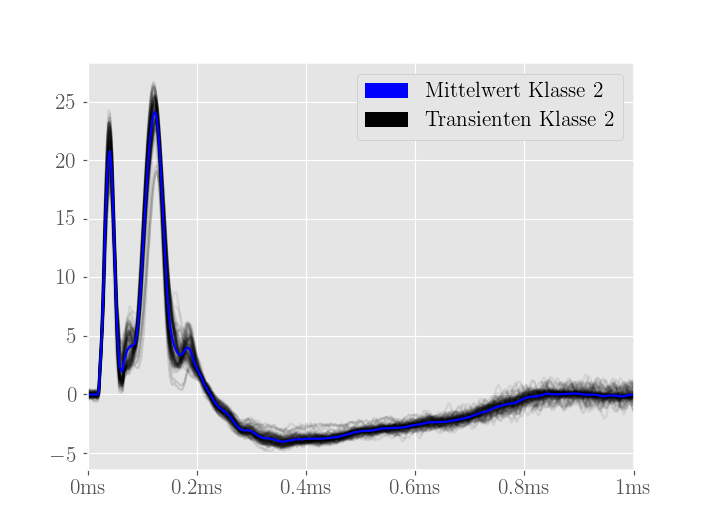

In [31]:
#fig = plt.figure()
plt.figure()
transients = cluster_2
average_40_cluster_1 = np.zeros(510)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=14)
for v in range(0,100):
    transient_rise_gradient = transients.iloc[v]['transient_rise_gradient']
    if transient_rise_gradient<0:
        z=-1
    else:
        z=1

    begin_index = transients.iloc[v]['begin_index']- 10 
    end_index = transients.iloc[v]['begin_index'] + 500
    if end_index>10000:
        end_index=9999
    if begin_index<0:
        begin_index = 0
    
    #normalisieren
    y_data_nn= np.asarray(transients.iloc[v]['filtered_signal'])[begin_index:end_index]*z
    y_data = y_data_nn/max(abs(y_data_nn))
    
    #correlation
    correlcoeff = np.corrcoef(average_40_c1,y_data)[0,1]
    #print(correlcoeff)
    #average
    average_40_cluster_1 = y_data_nn+average_40_cluster_1
    try:
        plot1 = plt.plot(np.arange(end_index-begin_index),(y_data_nn),color = 'black', linewidth=1.5,alpha=correlcoeff*0.3)
    except:
        continue
    #plt.xlim([transients.iloc[v]['begin_index']-100,transients.iloc[v]['begin_index']+1000])

average_40_c1 = average_40_cluster_1 /100
plot_mean = plt.plot(np.arange(end_index-begin_index),(average_40_c1), linewidth=1.5, color = 'blue')
#plt.plot(np.arange(end_index-begin_index),(average_6*z))


plt.xlim([0,500])
plt.xticks(range(0,600,100),('0ms','0.2ms','0.4ms','0.6ms','0.8ms','1ms'))
from matplotlib.patches import Rectangle
#plt.ylabel('Normierte Spannung [-]')
p1 = Rectangle((0, 0), 1, 1, fc="blue")
p2 = Rectangle((0, 0), 1, 1, fc="black")
legend([p1, p2], ['Mittelwert Klasse 2', 'Transienten Klasse 2'],frameon=True,framealpha=1,)
#plt.savefig('G:/Dropbox/Dropbox/Uni/Master/Master 6/PUEL/06_Ausarbeitung/PUEL_Ausarbeitung/Kapitel4/Outside_Klasse_22.pdf')
#plt.show()

In [ ]:
plot_transients (data_month_einschalt, 14, 'filtered_signal', 2)

In [ ]:
from scipy.signal import argrelextrema
fig = plt.figure()
transients = data_month_einschalt[data_month_einschalt['first_peak']>50]
average_6 = np.zeros(2010)
for v in range(0,5):
    transient_rise_gradient = transients.iloc[v]['transient_rise_gradient']
    if transient_rise_gradient<0:
        z=-1
    else:
        z=1

    begin_index = transients.iloc[v]['begin_index']- 10 
    end_index = transients.iloc[v]['begin_index'] + 2000
    if end_index>10000:
        end_index=9999
    if begin_index<0:
        begin_index = 0
    
    #normalisieren
    y_data_nn= np.asarray(transients.iloc[v]['filtered_signal'])[begin_index:end_index]*z
    y_data = y_data_nn/max(abs(y_data_nn))
    peaks = y_data[argrelextrema(y_data , np.greater)]
    y_data
    #correlation
    
    #average
    #average_6 = y_data+average_6
    try:
        plt.plot(np.arange(end_index-begin_index),(y_data))
        plt.scatter(argrelextrema(y_data , np.greater),peaks,color='blue')
    except:
        continue
    #plt.xlim([transients.iloc[v]['begin_index']-100,transients.iloc[v]['begin_index']+1000])

#average_5 = average_6 /6    
#plt.plot(np.arange(end_index-begin_index),(average_6*z))
plt.show()


In [ ]:
data_month_einschalt_filtered = data_month_einschalt[data_month_einschalt['first_peak']>50]

In [ ]:
argrelextrema(y_data , np.greater)

In [ ]:
data_month_einschalt['peak_2_3'] = data_month_einschalt['three_first_peaks_index'].apply(lambda x: int(x[2])-int(x[1]))
plt.figure()
data_month_einschalt['peak_2_3'].plot.hist(bins=100)
plt.show()


In [ ]:
#Abstand zwischen peaks 2 - 3 

all_data['peak_2_3'] = all_data['three_first_peaks_index'].apply(lambda x: max(int(x[2])-int(x[1]),int(x[1])-int(x[0])))
all_data_abstand = all_data[all_data['begin_index']<9000]
all_data_abstand = all_data_abstand[all_data_abstand['plugin_on_this_phase']]
f = figure()
all_data_abstand[all_data_abstand['peak_2_3']>50]['peak_2_3'].plot.hist(bins=50)
plt.show()



In [ ]:
#Abstand zwischen peaks 2 - 3 

all_data['peak_2_3'] = all_data['three_first_peaks_index'].apply(lambda x: max(int(x[2])-int(x[1]),int(x[1])-int(x[0])))
all_data_abstand = all_data[all_data['begin_index']<9000]
all_data_abstand = all_data_abstand[all_data_abstand['plugin_on_this_phase']]
f = figure()
all_data_abstand['transient_rise_gradient'].plot.hist(bins=50)
plt.show()


In [ ]:
#Abstand zwischen peaks 2 - 3 

all_data['peak_1_2'] = all_data['three_first_peaks_index'].apply(lambda x: int(x[1])-int(x[0]))
all_data_abstand = all_data[all_data['begin_index']<9000]
all_data_abstand = all_data_abstand[all_data['begin_index']>1000]
all_data_abstand = all_data_abstand[all_data_abstand['plugin_on_this_phase']]
f = figure()
all_data_abstand['peak_1_2'].plot.hist(bins=100)
plt.show()

In [ ]:
f=figure()
plt.scatter(all_data_abstand['peak_2_3'],all_data_abstand['first_peak'])

In [ ]:
testdata['filtered_signal']

In [ ]:
def create_array(x):
    x['filtered_signal']
    array = np.asarray(x['filtered_signal'])
    return array

In [7]:
#Correlation coefficient clustering test np.corrcoef
testdata = data_month
testdata = testdata[(testdata['begin_index']>2000) & (testdata['begin_index']<8000)]
testdata = testdata.reset_index(drop=True)
result_array = np.zeros(500)
 
for rows in range (0,len(testdata)):
    ts_array = (np.asarray(testdata.iloc[rows]['filtered_signal'])[(testdata.iloc[rows]['begin_index']-10):(testdata.iloc[rows]['begin_index']+490)])
    ts_array = ts_array/abs(max(ts_array))
    result_array = np.row_stack((result_array, ts_array))
    
correlation_matrix = np.corrcoef(result_array[1:len(testdata)])

In [8]:
data = correlation_matrix
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
0,1.000000,0.952118,0.888416,0.805872,0.855058,0.882745,-0.460030,-0.936220,0.879293,0.347750,...,0.787347,-0.738216,0.326817,-0.420651,0.309766,0.330124,0.364104,0.278100,0.069624,0.241802
1,0.952118,1.000000,0.912672,0.862985,0.868438,0.842254,-0.345617,-0.841084,0.883870,0.355389,...,0.874883,-0.633901,0.326363,-0.303029,0.311821,0.332766,0.369041,0.191684,0.031603,0.139427
2,0.888416,0.912672,1.000000,0.885965,0.924286,0.786208,-0.572457,-0.859241,0.759493,0.529893,...,0.908387,-0.617519,0.512283,-0.349459,0.500368,0.513787,0.539063,0.227997,0.144440,0.166661
3,0.805872,0.862985,0.885965,1.000000,0.946965,0.833617,-0.347226,-0.788285,0.851286,0.341974,...,0.827686,-0.418545,0.319056,-0.051138,0.321695,0.324560,0.345679,-0.022782,-0.075101,-0.084361
4,0.855058,0.868438,0.924286,0.946965,1.000000,0.852017,-0.532861,-0.846390,0.817828,0.335368,...,0.846410,-0.467547,0.325638,-0.102833,0.318630,0.323896,0.343210,-0.003087,-0.050971,-0.067081
5,0.882745,0.842254,0.786208,0.833617,0.852017,1.000000,-0.323015,-0.901692,0.930541,0.142834,...,0.587778,-0.558747,0.140976,-0.186817,0.135929,0.140128,0.162733,0.050628,-0.104746,0.031367
6,-0.460030,-0.345617,-0.572457,-0.347226,-0.532861,-0.323015,1.000000,0.592427,-0.171042,-0.464733,...,-0.483679,0.465492,-0.484403,0.438507,-0.460877,-0.473424,-0.476168,-0.324245,-0.245641,-0.249535
7,-0.936220,-0.841084,-0.859241,-0.788285,-0.846390,-0.901692,0.592427,1.000000,-0.823129,-0.372627,...,-0.671918,0.715464,-0.369087,0.436799,-0.357051,-0.368523,-0.392727,-0.265682,-0.093547,-0.247871
8,0.879293,0.883870,0.759493,0.851286,0.817828,0.930541,-0.171042,-0.823129,1.000000,0.135612,...,0.634062,-0.546631,0.116182,-0.150827,0.112509,0.121126,0.150643,0.059145,-0.216682,0.029138
9,0.347750,0.355389,0.529893,0.341974,0.335368,0.142834,-0.464733,-0.372627,0.135612,1.000000,...,0.463087,-0.485246,0.994746,-0.630829,0.994488,0.997402,0.997667,0.686239,0.361877,0.630842


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z=linkage(data, 'single', 'correlation')
#dendrogram(Z, color_threshold=0)


<IPython.core.display.Javascript object>


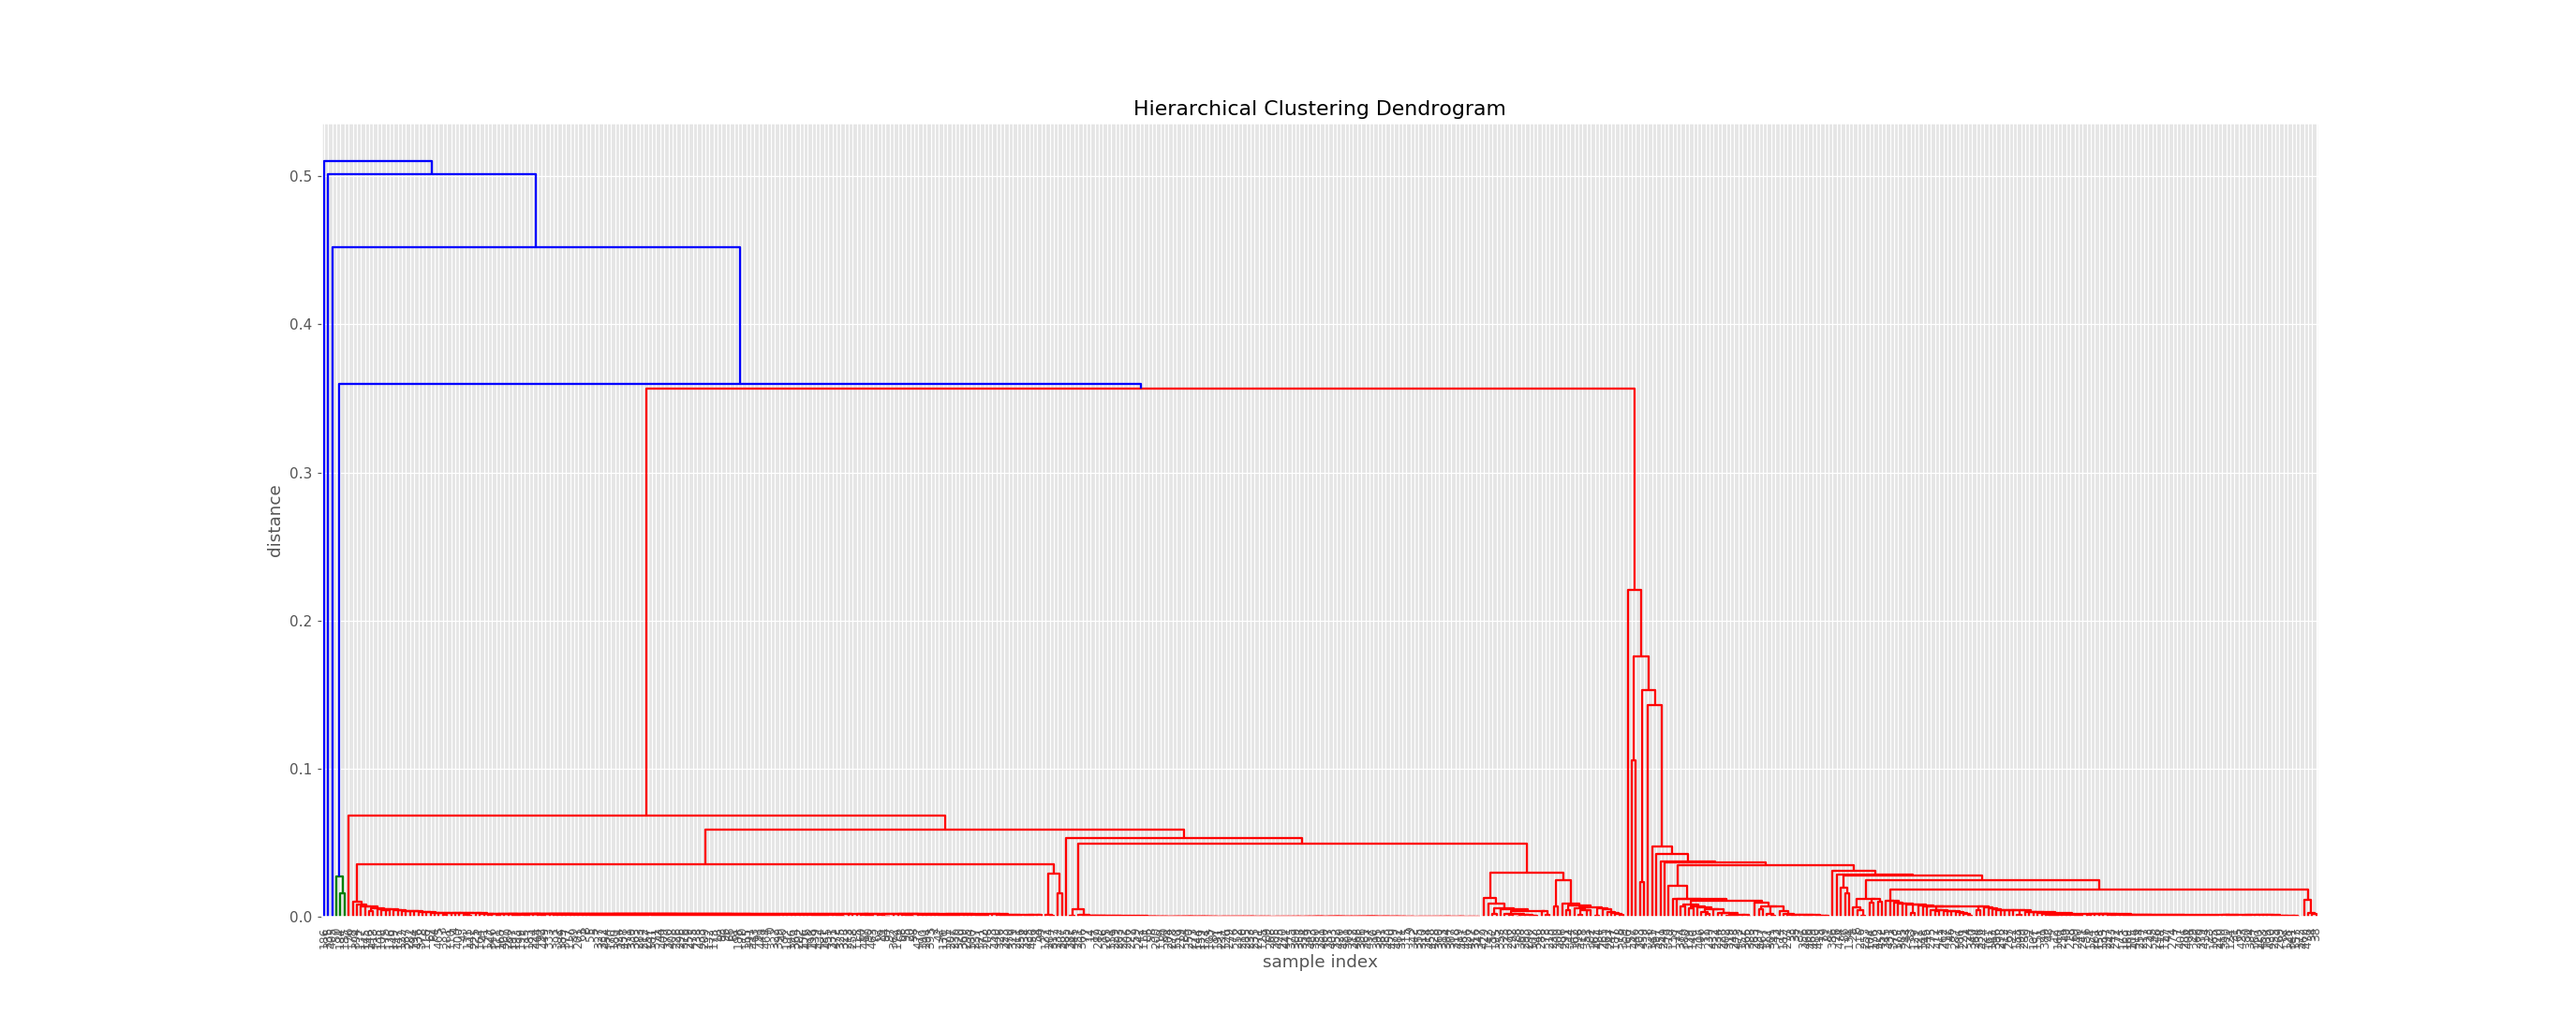

In [10]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [11]:
k=4
clusters = fcluster(Z, k, criterion='maxclust')
a = np.where( clusters==1 )
b = np.where( clusters==2 )
c = np.where(clusters==3)
d = np.where(clusters==4)

cluster_1 = testdata.ix[a]
cluster_2 = testdata.ix[b]
cluster_3 = testdata.ix[c]
cluster_4 = testdata.ix[d]

print (len(cluster_4)/len(clusters))

0.002053388090349076


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [ ]:
testdata = testdata.reset_index(drop=True)

In [49]:
max_d = 0.02
clusters = fcluster(Z, max_d, criterion='distance')

for count in range(1,max(clusters)+1):
    share = ((np.unique(clusters, return_counts=True)[1][count-1]) / len(clusters))*100
    
    print (str(count)+': '+ str(share)+'%')


a = np.where( clusters==2 )
b = np.where( clusters==3 )
c = np.where(clusters==9)
d = np.where(clusters==16)

cluster_1 = testdata.ix[a]
cluster_2 = testdata.ix[b]
cluster_3 = testdata.ix[c]
cluster_4 = testdata.ix[d]

clusters

1: 0.41067761807%
2: 0.205338809035%
3: 34.7022587269%
4: 0.616016427105%
5: 0.41067761807%
6: 20.7392197125%
7: 3.49075975359%
8: 0.41067761807%
9: 3.28542094456%
10: 0.205338809035%
11: 0.205338809035%
12: 0.205338809035%
13: 0.205338809035%
14: 0.205338809035%
15: 0.205338809035%
16: 8.00821355236%
17: 0.205338809035%
18: 0.616016427105%
19: 1.64271047228%
20: 21.7659137577%
21: 0.205338809035%
22: 0.205338809035%
23: 0.205338809035%
24: 0.205338809035%
25: 0.205338809035%
26: 0.205338809035%
27: 0.205338809035%
28: 0.205338809035%
29: 0.205338809035%
30: 0.205338809035%
31: 0.205338809035%


array([ 3,  3,  3,  3,  3,  3, 19, 20,  3,  6,  6, 16, 20, 16,  6,  3,  6,
        6,  3,  3,  3, 20, 20, 20, 20,  7, 21, 16, 19, 20, 20, 20, 20, 16,
       20, 16, 11, 16, 20,  3,  3,  3,  3,  3,  3, 20, 20, 20, 20, 20,  2,
        9,  7,  3,  3,  3, 20, 12,  6,  6,  3,  3,  3,  3,  3, 20,  3,  3,
        3, 20,  3, 20, 20,  7, 16,  3,  6,  6,  9, 16,  6, 16, 20, 20,  6,
        6, 18,  6,  7,  6,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        7,  6, 19, 20, 20, 20,  3, 20,  3,  3, 16,  6,  6,  3,  3,  3, 20,
        6, 20, 20,  3,  3, 20,  6,  6,  4, 20, 20,  3,  3,  3, 20, 18,  3,
        3,  3, 16, 16, 16, 26,  7, 20,  6,  3,  3,  3, 20,  3,  6, 20, 16,
       20, 20,  3,  3, 20, 20,  6, 20, 20,  9, 20,  3, 20, 28,  9,  3, 20,
        3,  3,  3,  3,  6, 20, 19, 20,  3,  3,  3,  3, 16,  3,  1,  1, 31,
        9,  3,  3,  3,  6,  3,  3,  3,  7,  3,  3,  3,  3,  6,  3,  3,  6,
        6,  6,  6,  3,  3,  3,  6,  3,  3,  3, 20,  7, 19, 20, 20,  6, 20,
       20,  6, 20,  3,  3

In [ ]:
cluster_2

In [ ]:
all_data_abstand